### **Tropical Cyclones (Gulf of Mexico and Japan)**
Violette CASTELLS, Solène LEMERCIER, Emilio GONZALES, Kilian RIVETTA

In [312]:
!pip install basemap

In [310]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(15,15) # graph size

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# function to plot images
def plot_im(lon,lat,im,size_points,var_name):

    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)

    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='robin',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)

    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    #im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)

# function to plot time series
def plot_ts(time,ts,line_type,var_name):

    # plot
    plot_date(time,ts,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

## Généralités : la base de données

In [ ]:
import os
os.environ['USE_AUTH_EPHEM'] = '0'

from google.colab import auth
auth.authenticate_user()

In [313]:
%%bigquery output --project alert-ground-261008
SELECT lon, lat, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.1998_2015
WHERE lon>258 AND lon<295 AND lat>15 AND lat<35
GROUP BY lon, lat

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Climatologie : SST Golfe du Mexique entre 1998 et 2015')

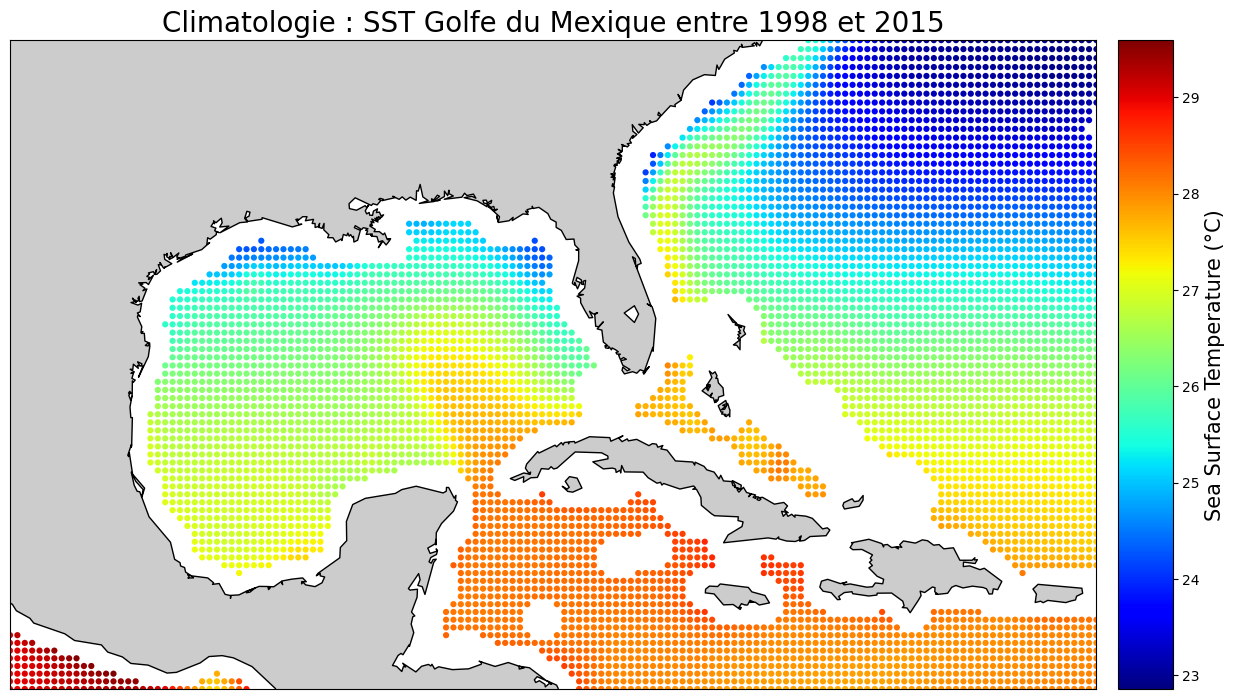

In [315]:
plot_im(output.lon, output.lat, output.mean_sst, 20, 'Sea Surface Temperature (°C)')
title('Climatologie : SST Golfe du Mexique entre 1998 et 2015', size=20)

In [316]:
%%bigquery output --project alert-ground-261008
SELECT lon, lat, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.1998_2015
WHERE lon>130 AND lon<170 AND lat>25 AND lat<55
GROUP BY lon, lat

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Climatologie : SST Japon entre 1998 et 2015')

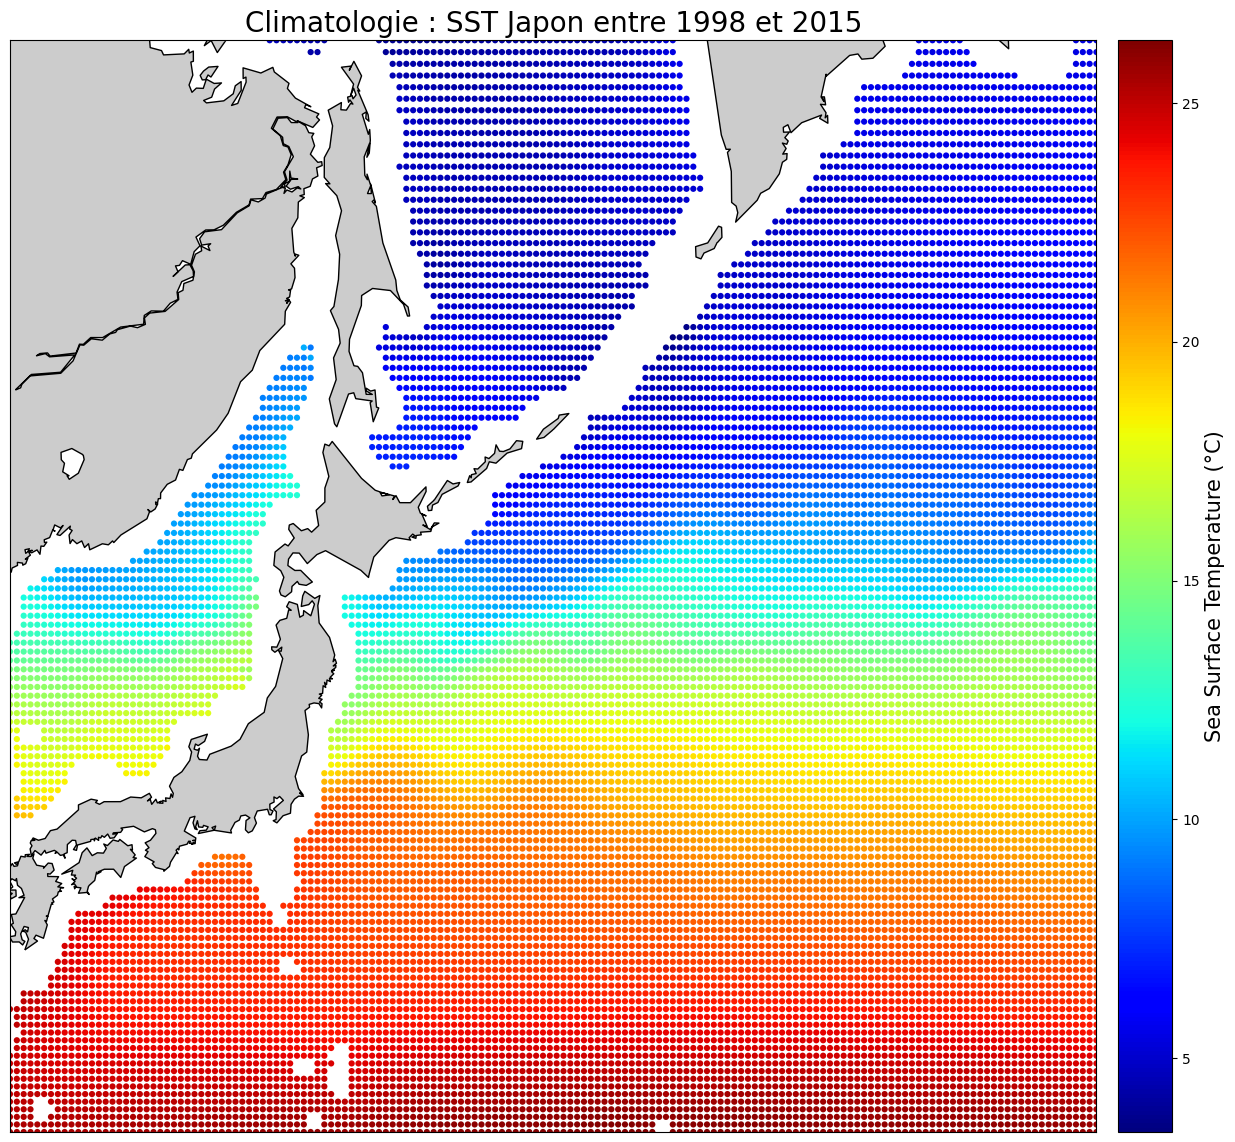

In [318]:
plot_im(output.lon, output.lat, output.mean_sst, 20, 'Sea Surface Temperature (°C)')
title('Climatologie : SST Japon entre 1998 et 2015', size=20)

In [320]:
%%bigquery output_spatial --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,time,avg(ssh) as ssh, avg(sst) as sst, max(sst) as max_sst
  FROM bdo2020.bdo2020.1998_2015_withtimes
  WHERE lon>258 AND lon<295 AND lat>15 AND lat<35 AND year=2005
  GROUP BY lon,lat,time
),

second_inter AS (
SELECT inter1.lon, inter1.lat, inter1.time,
inter1.sst-inter2.sst as diff_sst,
inter1.ssh-inter2.ssh as diff_ssh,
inter1.max_sst-inter2.max_sst as diff_max_sst,
FROM inter as inter1
LEFT JOIN inter as inter2
ON inter1.lon=inter2.lon
AND inter1.lat=inter2.lat
AND inter1.time=inter2.time-1)

SELECT lon, lat, MAX(diff_max_sst) AS max_diff_sst
FROM second_inter
GROUP BY lon, lat

Query is running:   0%|          |

Downloading:   0%|          |

Les anomalies observées dans le golfe correspondent au passage des ouragans Katrina :
![Katrina_2005_track.png](
+lUOe8qQQzdRjgfMzXrLx8ZuFp5NEOu0tq01FCLYp3FGEPRicSCN03kS8XiikGrQZ0huwJkMAWxQmd6Sm3hBtoOljFi8aJsikMrmDWUo7IKniyF80kBQ9cFUspoUZztCNYgrpJdRqui0lImawLvhSAeQyWRiTnSBUtOGeMMU1ISFesMUl0DfNva3FUiWFN/ye1KFSwGI5ZcK0lTa3k0BfP0d0y1sNRMcIbS4ocwtQHWa1WWXCipUk2hkCn5yREVlZx4ArELC5UKxFgRLM4JMbU2Qy1KypVJMp0Hp4ZslcU0N1atLXGkRmXJEWstq76jaGFZMta0xuVc27WoCaxrr9/3LQbbGIsxSkqKNQYx4K0hLZAValWsTTjb4PfzXNp7T6Ub2utFIM1CLQ1Yn6YmTtWnhMHQGSoGZxvsPWcFFZxvn3rGNPegqGCMw5mK1oqIEHN7HV6EuEDMtbW41kadd06xFrwRjMhTu+9Tu2IFawS1rfVSkmCdkCQzWKGYzMNUiSVjMKiWlhqaew5lQUxBNVO1EozB1o5sC1OGkpV//Ec/4N+al3zcG7ye6cZMcSO9eKZ//oDeH8A+WxSe67me6z9mg6HtMzUvECPk9AQvLLBkmGbqqSEmZh14mEbELdScOPMac3TUn+5hrr9VPD7Tj0+dh+3z/pnX8ls4KgVKquzuKvNOmHeeu+GSi3+wQnbvSbXiveNH/3Jk+SiIeW4lfa7f7nlWXODFdwvfen3L1Sbw5fUVflxxSg88HgJ3Pxl4/EmgTvkbNCf9Ta1BK3yxpvujLf/o9x7pv7XmeFcb3+wbssz9/wAjggXsl0t7HwAAAFN0RVh0Y29tbWVudABGaWxlIHNvdXJjZTogaHR0cHM6Ly9jb21tb25zLndpa2ltZWRpYS5vcmcvd2lraS9GaWxlOkthdHJpbmFfMjAwNV90cmFjay5wbmc8nTHiAAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDE1LTA4LTI4VDIxOjA3OjM1KzAwOjAwne2UFwAAACV0RVh0ZGF0ZTptb2RpZnkAMjAxNS0wOC0yOFQyMTowNzozNSswMDowMOywLKsAAABHdEVYdHNvZnR3YXJlAEltYWdlTWFnaWNrIDYuNy43LTEwIDIwMTQtMDMtMDYgUTE2IGh0dHA6Ly93d3cuaW1hZ2VtYWdpY2sub3Jnb5+iogAAABh0RVh0VGh1bWI6OkRvY3VtZW50OjpQYWdlcwAxp/+7LwAAABl0RVh0VGh1bWI6OkltYWdlOjpoZWlnaHQAMTY2OX/qkmEAAAAYdEVYdFRodW1iOjpJbWFnZTo6V2lkdGgAMjcwMNDOG1QAAAAZdEVYdFRodW1iOjpNaW1ldHlwZQBpbWFnZS9wbmc/slZOAAAAF3RFWHRUaHVtYjo6TVRpbWUAMTQ0MDc5NjA1NZDQVMAAAAAUdEVYdFRodW1iOjpTaXplADQuMDMzTUJCXFWWUQAAADN0RVh0VGh1bWI6OlVSSQBmaWxlOi8vL3RtcC9sb2NhbGNvcHlfOTIyNTE1OWE5MmEwLTEucG5n7c1gCwAAAABJRU5ErkJggg==)

Emily :

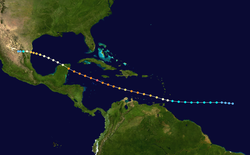

et Wilma.

Text(0.5, 1.0, 'Ecarts journaliers maximaux observées dans le Golfe du Mexique en 2005')

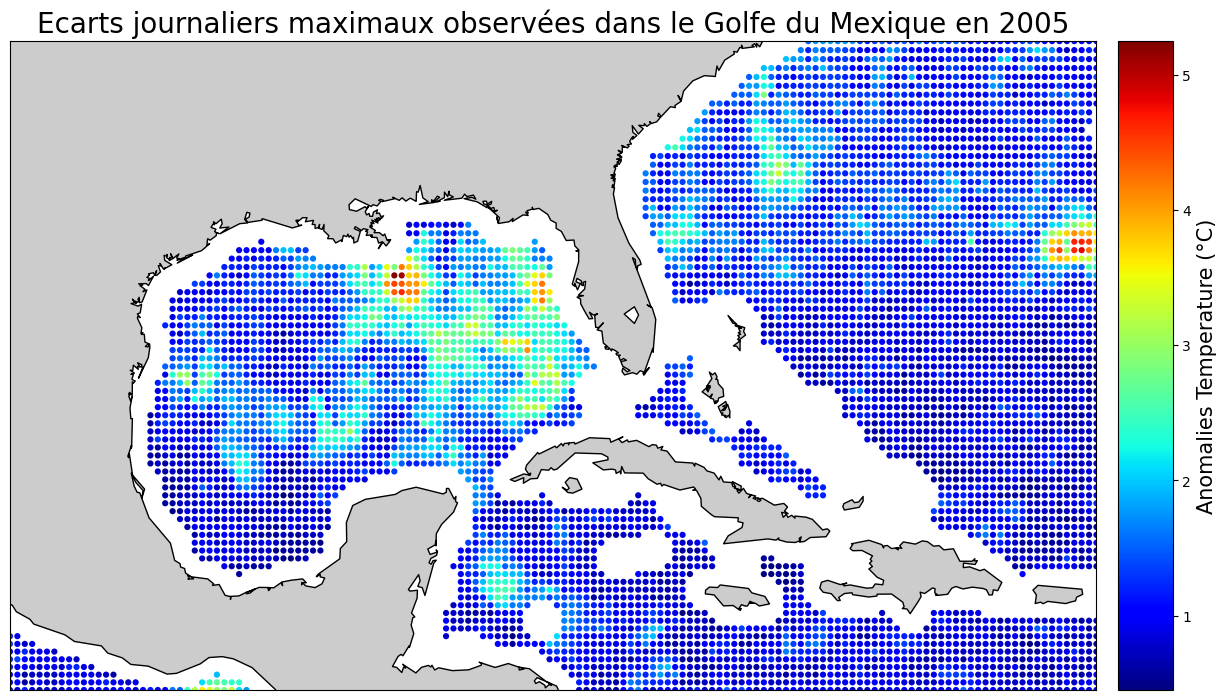

In [323]:
plot_im(output_spatial.lon, output_spatial.lat, output_spatial.max_diff_sst, 20, 'Anomalies Temperature (°C)')
title('Ecarts journaliers maximaux observées dans le Golfe du Mexique en 2005', size=20)

In [ ]:
%%bigquery output_time_serie --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,time,avg(ssh) as ssh, avg(sst) as sst, max(sst) as max_sst
  FROM bdo2020.bdo2020.1998_2015_withtimes
  WHERE lon>258 AND lon<295 AND lat>15 AND lat<35 AND year=2005
  GROUP BY lon,lat,time
),

second_inter AS (
SELECT inter1.lon, inter1.lat, inter1.time,
inter1.sst-inter2.sst as diff_sst,
inter1.ssh-inter2.ssh as diff_ssh,
inter1.max_sst-inter2.max_sst as diff_max_sst,
FROM inter as inter1
LEFT JOIN inter as inter2
ON inter1.lon=inter2.lon
AND inter1.lat=inter2.lat
AND inter1.time=inter2.time-1)

SELECT time, MAX(diff_max_sst) AS max_diff_sst
FROM second_inter
GROUP BY time
ORDER BY time

Query is running:   0%|          |

Downloading:   0%|          |

# Détermination du seuil

In [334]:
%%bigquery output --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,time,avg(ssh) as mean_ssh, avg(sst) as mean_sst, min(ssh) as min_ssh, min(sst) as min_sst, max(ssh) as max_ssh, max(sst) as max_sst
  FROM bdo2020.bdo2020.1998_2015_withtimes
  WHERE lon>258 AND lon<295 AND lat>15 AND lat<35 AND year=2005
  GROUP BY lon,lat,time
  ORDER BY lon,lat,time
)

SELECT inter1.lon, inter1.lat, inter1.time,
inter1.mean_sst-inter2.mean_sst as diff_mean_sst,
inter1.min_sst-inter2.min_sst as diff_min_sst,
inter1.max_sst-inter2.max_sst as diff_max_sst,
inter1.mean_ssh-inter2.mean_ssh as diff_mean_ssh,
inter1.min_ssh-inter2.min_ssh as diff_min_ssh,
inter1.max_ssh-inter2.max_ssh as diff_max_ssh,
FROM inter as inter1
LEFT JOIN inter as inter2
ON inter1.lon=inter2.lon
AND inter1.lat=inter2.lat
AND inter1.time=inter2.time-1

Query is running:   0%|          |

Downloading:   0%|          |

(array([1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00, 3.00000e+00,
        0.00000e+00, 7.00000e+00, 1.20000e+01, 0.00000e+00, 1.00000e+01,
        1.00000e+01, 0.00000e+00, 1.10000e+01, 0.00000e+00, 2.90000e+01,
        1.00000e+02, 0.00000e+00, 1.53000e+02, 0.00000e+00, 3.13000e+02,
        6.48000e+02, 0.00000e+00, 1.43500e+03, 3.35100e+03, 0.00000e+00,
        8.79500e+03, 0.00000e+00, 2.72360e+04, 8.87090e+04, 0.00000e+00,
        2.41005e+05, 4.56443e+05, 0.00000e+00, 5.47471e+05, 0.00000e+00,
        4.13445e+05, 2.10040e+05, 0.00000e+00, 8.29480e+04, 1.14630e+04,
        1.93910e+04, 1.32390e+04, 0.00000e+00, 6.06500e+03, 3.22900e+03,
        0.00000e+00, 1.72200e+03, 0.00000e+00, 1.02400e+03, 6.73000e+02,
        0.00000e+00, 4.57000e+02, 3.46000e+02, 0.00000e+00, 2.31000e+02,
        0.00000e+00, 1.80000e+02, 1.19000e+02, 0.00

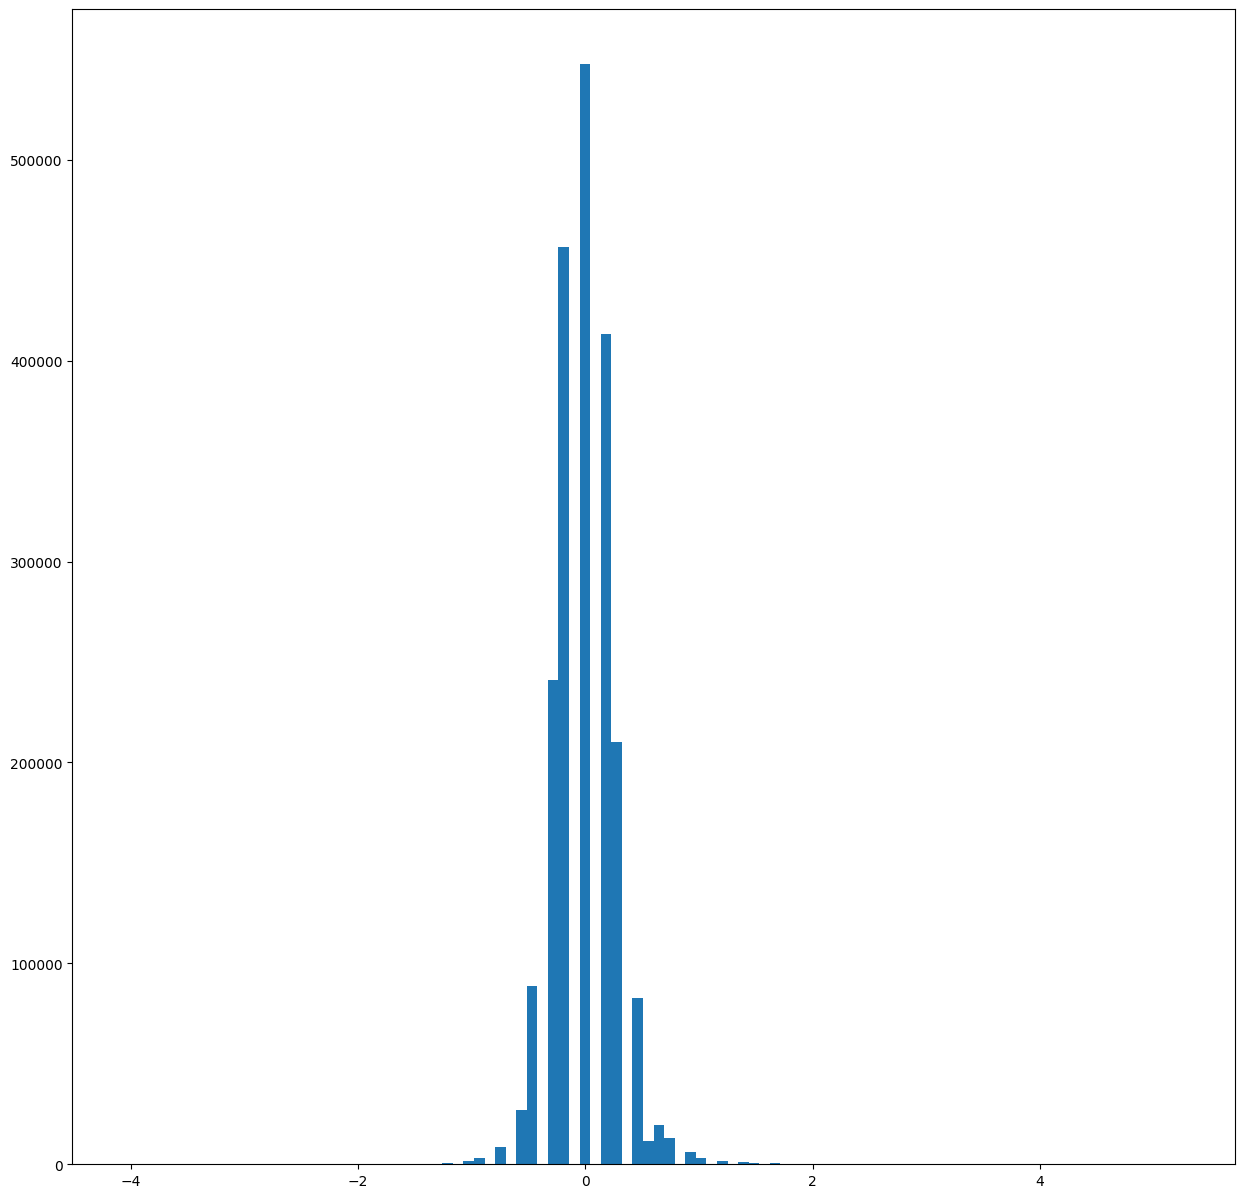

In [335]:
hist(output.diff_mean_sst, bins=100)

Nous prendrons donc un seuil de 0.7°C dans la suite de l'étude

# Détection des ouragans par différences de SST dans le Golfe du Mexique sur l'année 2005

On considère le passage d'un ouragan en fonction d'un seuil de baisse journalier de température.

In [ ]:
%%bigquery out_seuil --project alert-ground-261008
SELECT lon, lat, sst, dayofyear AS doy
FROM bdo2020.bdo2020.1998_2015_withtimes

WHERE lon >= 258 AND lon <= 280 AND lat >= 17 AND lat <= 32 and (year = 2005)
ORDER BY lon, lat, dayofyear

Query is running:   0%|          |

Downloading:   0%|          |

In [295]:
df = pd.DataFrame(out_seuil)

lons = np.sort(df['lon'].unique())
lats = np.sort(df['lat'].unique())
times = np.sort(df['doy'].unique())

sst_matrix = np.full((len(lons), len(lats), len(times)), np.nan)

# Create a mapping from value to index for lon, lat, and doy
lon_to_index = {lon: idx for idx, lon in enumerate(lons)}
lat_to_index = {lat: idx for idx, lat in enumerate(lats)}
time_to_index = {time: idx for idx, time in enumerate(times)}

# Vectorize the mapping operation
lon_idx = df['lon'].map(lon_to_index).to_numpy()
lat_idx = df['lat'].map(lat_to_index).to_numpy()
time_idx = df['doy'].map(time_to_index).to_numpy()

# Assign values to sst_matrix
sst_matrix[lon_idx, lat_idx, time_idx] = df['sst'].to_numpy()

sst_diff= sst_matrix[:,:,:-1] - sst_matrix[:,:,1:]
thresh= 1.2

sst_flag = np.zeros_like(sst_diff, dtype=np.float)
sst_flag[sst_diff > thresh] = 1
sst_flag[np.isnan(sst_diff)] = np.nan

lon_unique= np.unique(out_seuil.lon)
lat_unique= np.unique(out_seuil.lat)

import datetime
def get_date_and_text(day_of_year, year):
    # Convert day of year to a date
    date = datetime.datetime(year, 1, 1) + datetime.timedelta(day_of_year - 1)

    # Format the date and return the header
    header = f"{date.strftime('%d %B %Y')}"
    return header

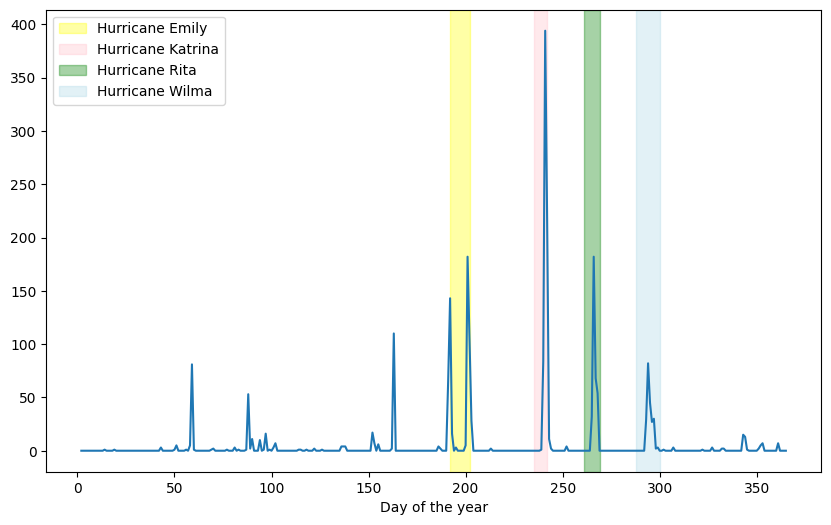

In [324]:
# Count number of flags per day
sum_over_time = np.nansum(sst_flag, axis=(0, 1))
# Find the index of the time step with the maximum sum
#max_time_index = np.argmax(sum_over_time)
#print(max_time_index)

figure(figsize= (10,6))
plt.plot(times[1:], sum_over_time)
plt.axvspan(192, 202, color='yellow', alpha=0.35, label= 'Hurricane Emily') # Emily
plt.axvspan(235, 242, color='pink', alpha=0.35, label= 'Hurricane Katrina') # Katrina
plt.axvspan(261, 269, color='green', alpha=0.35, label= 'Hurricane Rita') # Rita
plt.axvspan(288, 300, color='lightblue', alpha=0.35, label= 'Hurricane Wilma') # Wilma


plt.xlabel('Day of the year')
plt.legend()


On observe quatres pics à l'été 2005, correspondant dans l'ordre aux ouragans Emily (16 juillet), Katrina (25 aout), Rita (17 septembre) et Wilma (25 octobre).

# Etude des trajectoires des cyclones

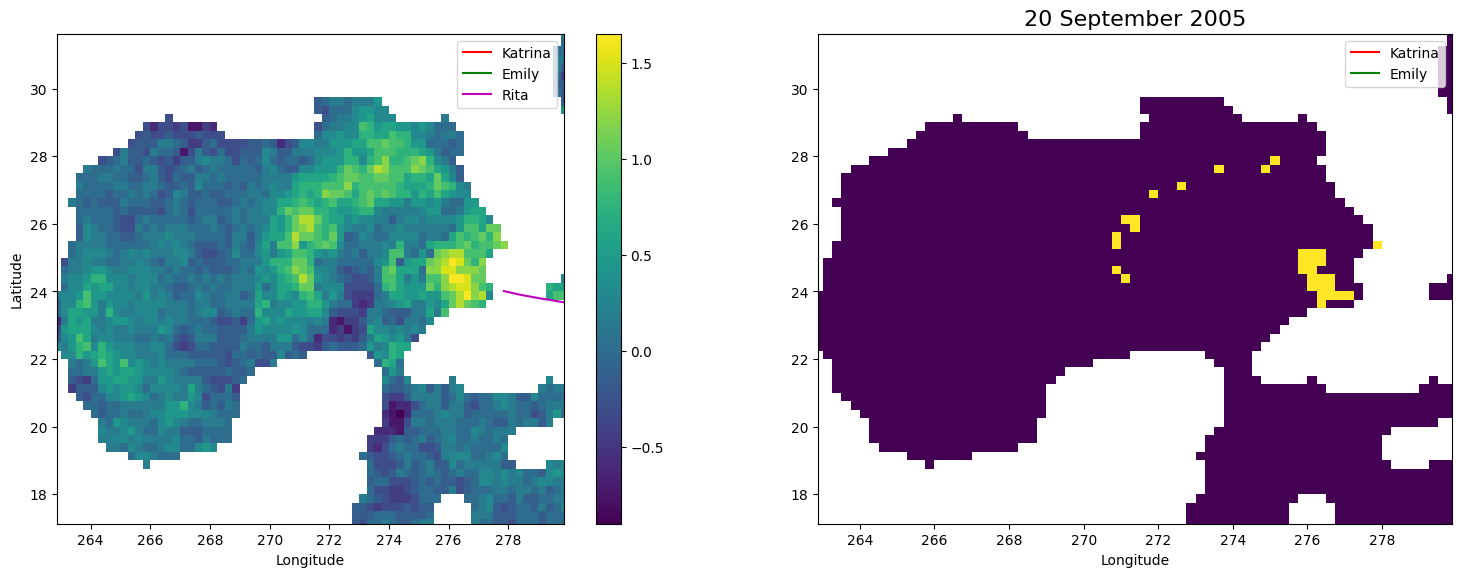

In [300]:
Kat=pd.read_csv('Katrina.txt',sep='\t')
Em=pd.read_csv('Emily.txt',sep='\t')
Ri=pd.read_csv('Rita.txt',sep='\t')

jour= 263

Kat=Kat.where(Kat['time']==jour+38352)
Em=Em.where(Em['time']==jour+38352)
Ri=Ri.where(Ri['time']==jour+38352)

figure(figsize=(18,14))
subplot(2,2,1)
plt.plot(360+Kat['lon'],Kat['lat'],'r',label='Katrina')
plt.plot(360+Em['lon'],Em['lat'],'g',label='Emily')
plt.plot(360+Ri['lon'],Ri['lat'],'m',label='Rita')
plt.pcolormesh(lon_unique, lat_unique,sst_diff[:,:,jour].T)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([min(lon_unique), max(lon_unique)])
plt.ylim([min(lat_unique), max(lat_unique)])
plt.legend()

subplot(2,2,2)
plt.pcolormesh(lon_unique, lat_unique, sst_flag[:,:,jour].T)
plt.plot(360+Kat['lon'],Kat['lat'],'r',label='Katrina')
plt.plot(360+Em['lon'],Em['lat'],'g',label='Emily')
plt.xlabel('Longitude')
header = get_date_and_text(jour, 2005)
plt.title(header, size= 16)
plt.xlim([min(lon_unique), max(lon_unique)])
plt.ylim([min(lat_unique), max(lat_unique)])
plt.legend()

Les Best Tracks (trajectoires de référence) sont données par International Best Track Archive for Climate Stewardship de la NOAA.
Dans la suite nous allons tenter d'établir nous même la trajectoire de l'ouragan en fonction des points "flagués" précedemment et à partir d'une méthode SVR.

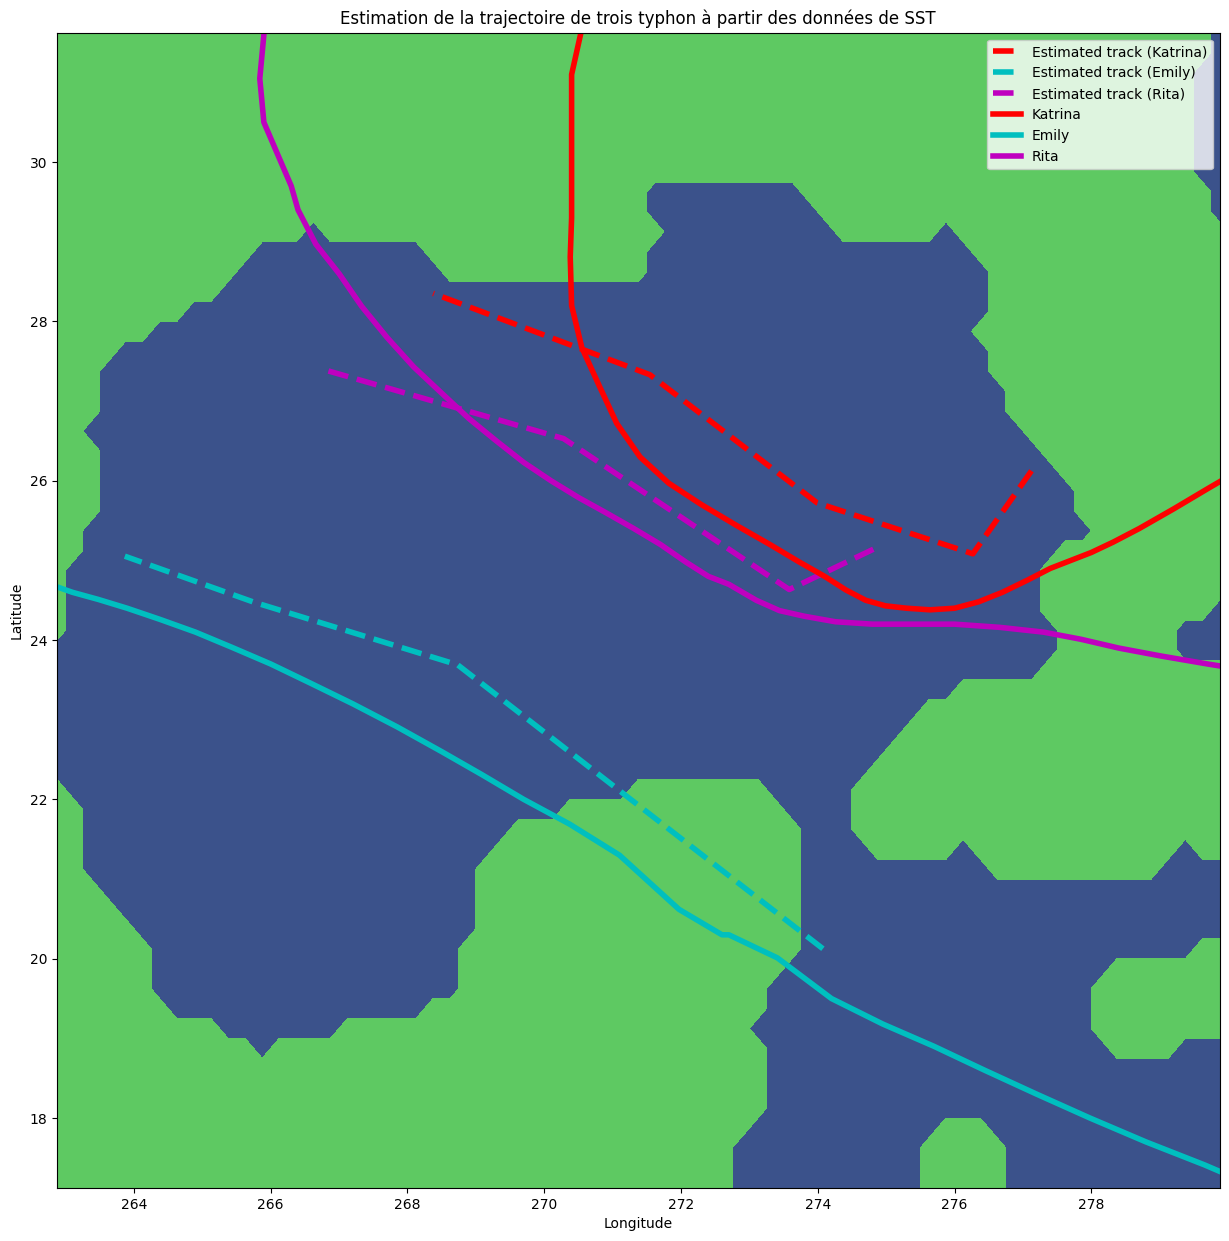

In [308]:
deb=234
fin=241

lonmean=[]
latmean=[]

for t in range(deb,fin+1):
  idx = np.argwhere((sst_flag[:,:,t]==1))
  lonmean.append(np.mean(lon_unique[idx[:,0]]))
  latmean.append(np.mean(lat_unique[idx[:,1]]))

plt.plot(lonmean, latmean,'--r',linewidth=4,label='Estimated track (Katrina)')

deb=195
fin=202

lonmean=[]
latmean=[]

for t in range(deb,fin+1):
  idx = np.argwhere((sst_flag[:,:,t]==1))
  lonmean.append(np.mean(lon_unique[idx[:,0]]))
  latmean.append(np.mean(lat_unique[idx[:,1]]))

plt.plot(lonmean, latmean,'--c',linewidth=4,label='Estimated track (Emily)')

deb=262
fin=267

lonmean=[]
latmean=[]

for t in range(deb,fin+1):
  idx = np.argwhere((sst_flag[:,:,t]==1))
  lonmean.append(np.mean(lon_unique[idx[:,0]]))
  latmean.append(np.mean(lat_unique[idx[:,1]]))

plt.plot(lonmean, latmean,'--m',linewidth=4,label='Estimated track (Rita)')


Em=pd.read_csv('Emily.txt',sep='\t')
Kat=pd.read_csv('Katrina.txt',sep='\t')
Ri=pd.read_csv('Rita.txt',sep='\t')

plt.title('Estimation de la trajectoire de trois typhon à partir des données de SST')
plt.plot(360+Kat['lon'],Kat['lat'],'r',linewidth=4,label='Katrina')
plt.plot(360+Em['lon'],Em['lat'],'c',linewidth=4,label='Emily')
plt.plot(360+Ri['lon'],Ri['lat'],'m',linewidth=4,label='Rita')
plt.contourf(lon_unique, lat_unique,np.isnan(sst_diff[:,:,jour]).T)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([min(lon_unique), max(lon_unique)])
plt.ylim([min(lat_unique), max(lat_unique)])
plt.legend()

# Fréquences spatiales et temporelles d'apparition d'un ouragan

In [330]:
%%bigquery output6 --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,year, month, time, ssh, sst
  FROM
    bdo2020.bdo2020.1998_2015_withtimes
  WHERE
    lon>258 AND lon<295 AND lat>18 AND lat<32
),

second_inter AS (
  SELECT
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon , inter1.sst - inter2.sst AS diff_sst, inter1.ssh - inter2.ssh AS diff_ssh
  FROM
    inter AS inter1
  LEFT JOIN
    inter AS inter2
  ON
    inter1.lon = inter2.lon
    AND inter1.lat = inter2.lat
    AND inter1.time = inter2.time - 1
  ORDER BY
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon
),

third_inter AS (
  SELECT lon, lat, year, month,
  AVG(diff_ssh) AS mean_ssh, AVG(diff_sst) AS mean_sst, MIN(diff_ssh) AS min_ssh, MIN(diff_sst) AS min_sst, MAX(diff_ssh) AS max_ssh, MAX(diff_sst) AS max_sst,
  (SELECT COUNT(*) FROM second_inter as sec WHERE sec.year=second_inter.year AND sec.month=second_inter.month AND sec.lon=second_inter.lon AND sec.lat=second_inter.lat AND diff_sst>1.7) AS nb_of_days_with_cyclons
  FROM second_inter
  GROUP BY lon, lat, year, month
  ORDER BY lon, lat, year, month
)

SELECT
  lon, lat, AVG(mean_ssh) AS mean_ssh, AVG(mean_sst) AS mean_sst, MIN(min_ssh) AS min_ssh, MIN(min_sst) AS min_sst, MAX(max_ssh) AS max_ssh, MAX(max_sst) AS max_sst,
  SUM(nb_of_days_with_cyclons)/(2*366 + 15*365) AS percent_of_the_time_with_cyclons
FROM
  third_inter
GROUP BY lon, lat

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, "Fréquences d'apparition de cyclones dans le Golfe du Mexique entre 1998 et 2015")

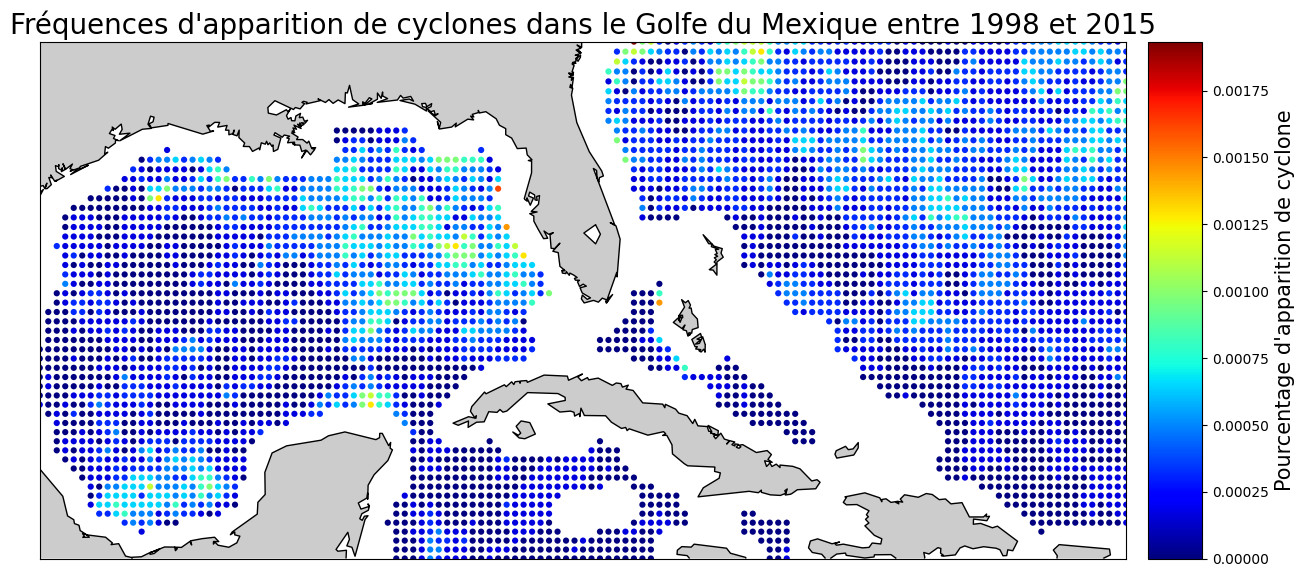

In [340]:
plot_im(output6.lon, output6.lat, output6.percent_of_the_time_with_cyclons, 20, 'Pourcentage d\'apparition de cyclone')
title('Fréquence d\'apparition de cyclones dans le Golfe du Mexique entre 1998 et 2015', size=20)

In [348]:
%%bigquery output7 --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,year, month, time, ssh, sst
  FROM
    bdo2020.bdo2020.1998_2015_withtimes
  WHERE
    lon>258 AND lon<295 AND lat>18 AND lat<32
),

second_inter AS (
  SELECT
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon , inter1.sst - inter2.sst AS diff_sst, inter1.ssh - inter2.ssh AS diff_ssh
  FROM
    inter AS inter1
  LEFT JOIN
    inter AS inter2
  ON
    inter1.lon = inter2.lon
    AND inter1.lat = inter2.lat
    AND inter1.time = inter2.time - 1
  ORDER BY
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon
),

third_inter AS (
  SELECT lon, lat, year, month,
  AVG(diff_ssh) AS mean_ssh, AVG(diff_sst) AS mean_sst, MIN(diff_ssh) AS min_ssh, MIN(diff_sst) AS min_sst, MAX(diff_ssh) AS max_ssh, MAX(diff_sst) AS max_sst,
  (SELECT COUNT(*) FROM second_inter as sec WHERE sec.year=second_inter.year AND sec.month=second_inter.month AND sec.lon=second_inter.lon AND sec.lat=second_inter.lat AND diff_sst>1.7) AS nb_of_days_with_cyclons
  FROM second_inter
  GROUP BY lon, lat, year, month
  ORDER BY lon, lat, year, month
)

SELECT
  month, AVG(mean_ssh) AS mean_ssh, AVG(mean_sst) AS mean_sst, MIN(min_ssh) AS min_ssh, MIN(min_sst) AS min_sst, MAX(max_ssh) AS max_ssh, MAX(max_sst) AS max_sst,
  AVG(nb_of_days_with_cyclons)/(30.5) percentage_days_with_cyclons
FROM
  third_inter
GROUP BY month
ORDER BY month

Query is running:   0%|          |

Downloading:   0%|          |

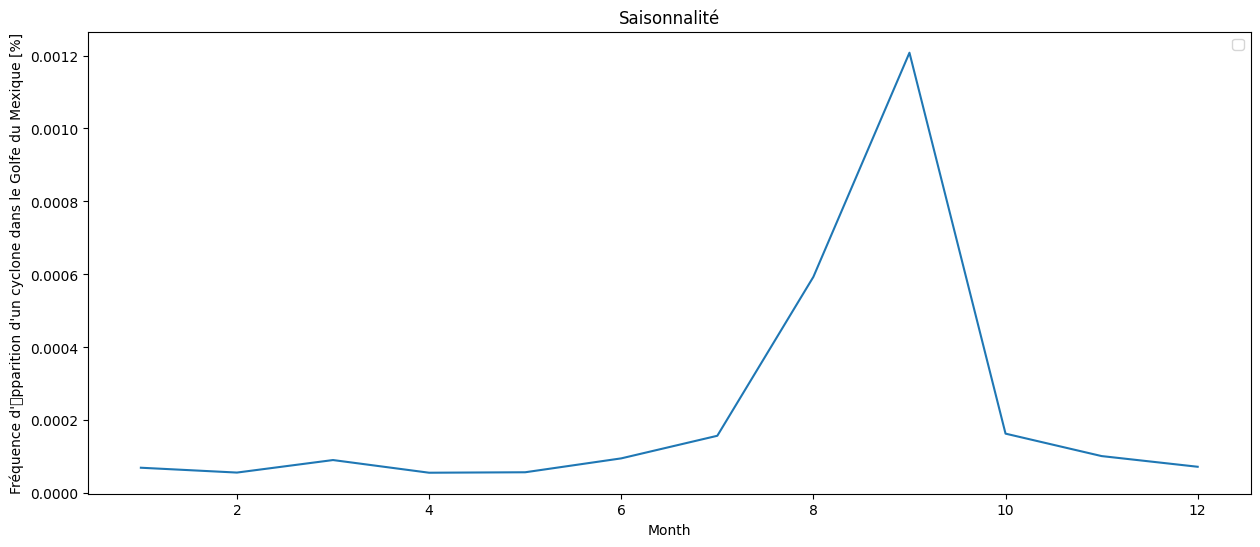

In [349]:
plt.figure(figsize=(15,6))
plot(output7.month, output7.percentage_days_with_cyclons)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Month")
plt.ylabel("Fréquence d'\apparition d'un cyclone dans le Golfe du Mexique [%]")
plt.title("Saisonnalité")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

# Application de la méthode au Japon

In [336]:
%%bigquery output7 --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,time,month,AVG(ssh) AS mean_ssh,AVG(sst) AS mean_sst
  FROM
    bdo2020.bdo2020.1998_2015_withtimes
  WHERE
    lon > 130 AND lon < 170 AND lat > 25 AND lat < 55
  GROUP BY
    lon, lat, time,month
)

SELECT
  inter1.time, AVG(inter2.mean_sst - inter1.mean_sst) AS diff_sst, inter1.month
FROM
  inter AS inter1
LEFT JOIN
  inter AS inter2
ON
  inter1.lon = inter2.lon
  AND inter1.lat = inter2.lat
  AND inter1.time = inter2.time - 1
GROUP BY
  inter1.time, inter1.month
ORDER BY
  inter1.time, inter1.month

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, 'Ecarts journaliers en fonction du mois au Japon')

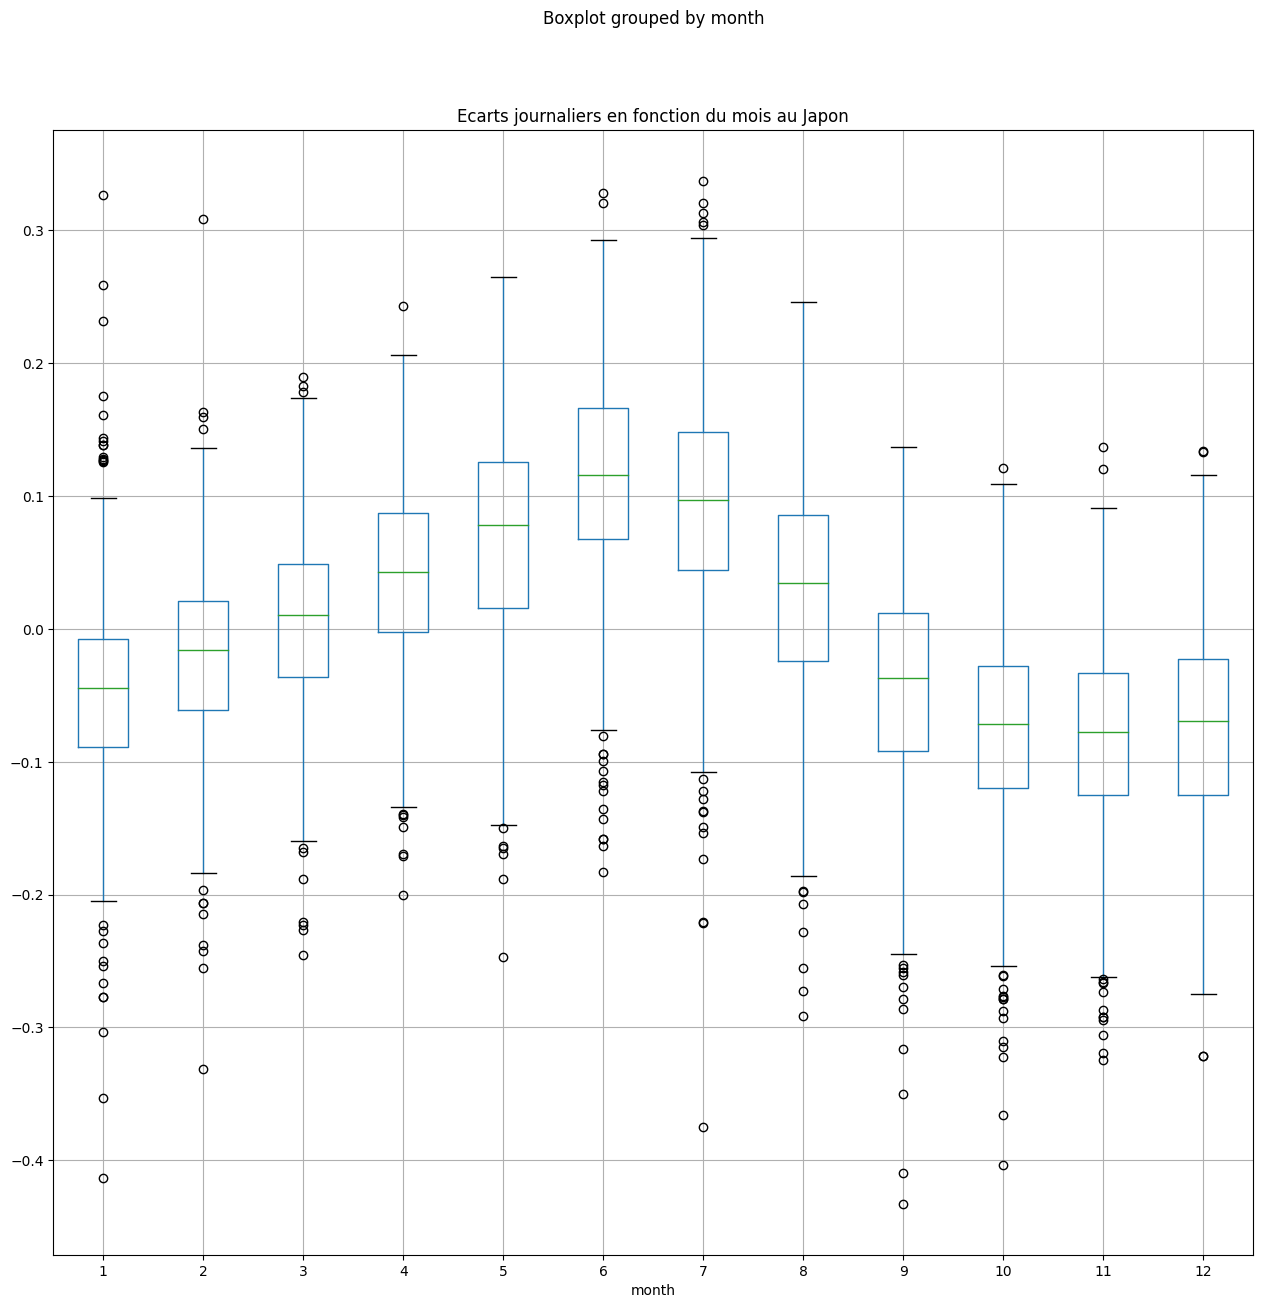

In [338]:
output7.boxplot(column='diff_sst', by='month')
title('Ecarts journaliers en fonction du mois au Japon')

In [341]:
%%bigquery output6 --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,year, month, time, ssh, sst
  FROM
    bdo2020.bdo2020.1998_2015_withtimes
  WHERE
    lon>130 AND lon<170 AND lat>25 AND lat<55
),

second_inter AS (
  SELECT
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon , inter1.sst - inter2.sst AS diff_sst, inter1.ssh - inter2.ssh AS diff_ssh
  FROM
    inter AS inter1
  LEFT JOIN
    inter AS inter2
  ON
    inter1.lon = inter2.lon
    AND inter1.lat = inter2.lat
    AND inter1.time = inter2.time - 1
  ORDER BY
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon
),

third_inter AS (
  SELECT lon, lat, year, month,
  AVG(diff_ssh) AS mean_ssh, AVG(diff_sst) AS mean_sst, MIN(diff_ssh) AS min_ssh, MIN(diff_sst) AS min_sst, MAX(diff_ssh) AS max_ssh, MAX(diff_sst) AS max_sst,
  (SELECT COUNT(*) FROM second_inter as sec WHERE sec.year=second_inter.year AND sec.month=second_inter.month AND sec.lon=second_inter.lon AND sec.lat=second_inter.lat AND diff_sst>1.7) AS nb_of_days_with_cyclons
  FROM second_inter
  GROUP BY lon, lat, year, month
  ORDER BY lon, lat, year, month
)

SELECT
  lon, lat, AVG(mean_ssh) AS mean_ssh, AVG(mean_sst) AS mean_sst, MIN(min_ssh) AS min_ssh, MIN(min_sst) AS min_sst, MAX(max_ssh) AS max_ssh, MAX(max_sst) AS max_sst,
  SUM(nb_of_days_with_cyclons)/(2*366 + 15*365) AS percent_of_the_time_with_cyclons
FROM
  third_inter
GROUP BY lon, lat

Query is running:   0%|          |

Downloading:   0%|          |

Text(0.5, 1.0, "Fréquence d'apparition de cyclones au Japon entre 1998 et 2015")

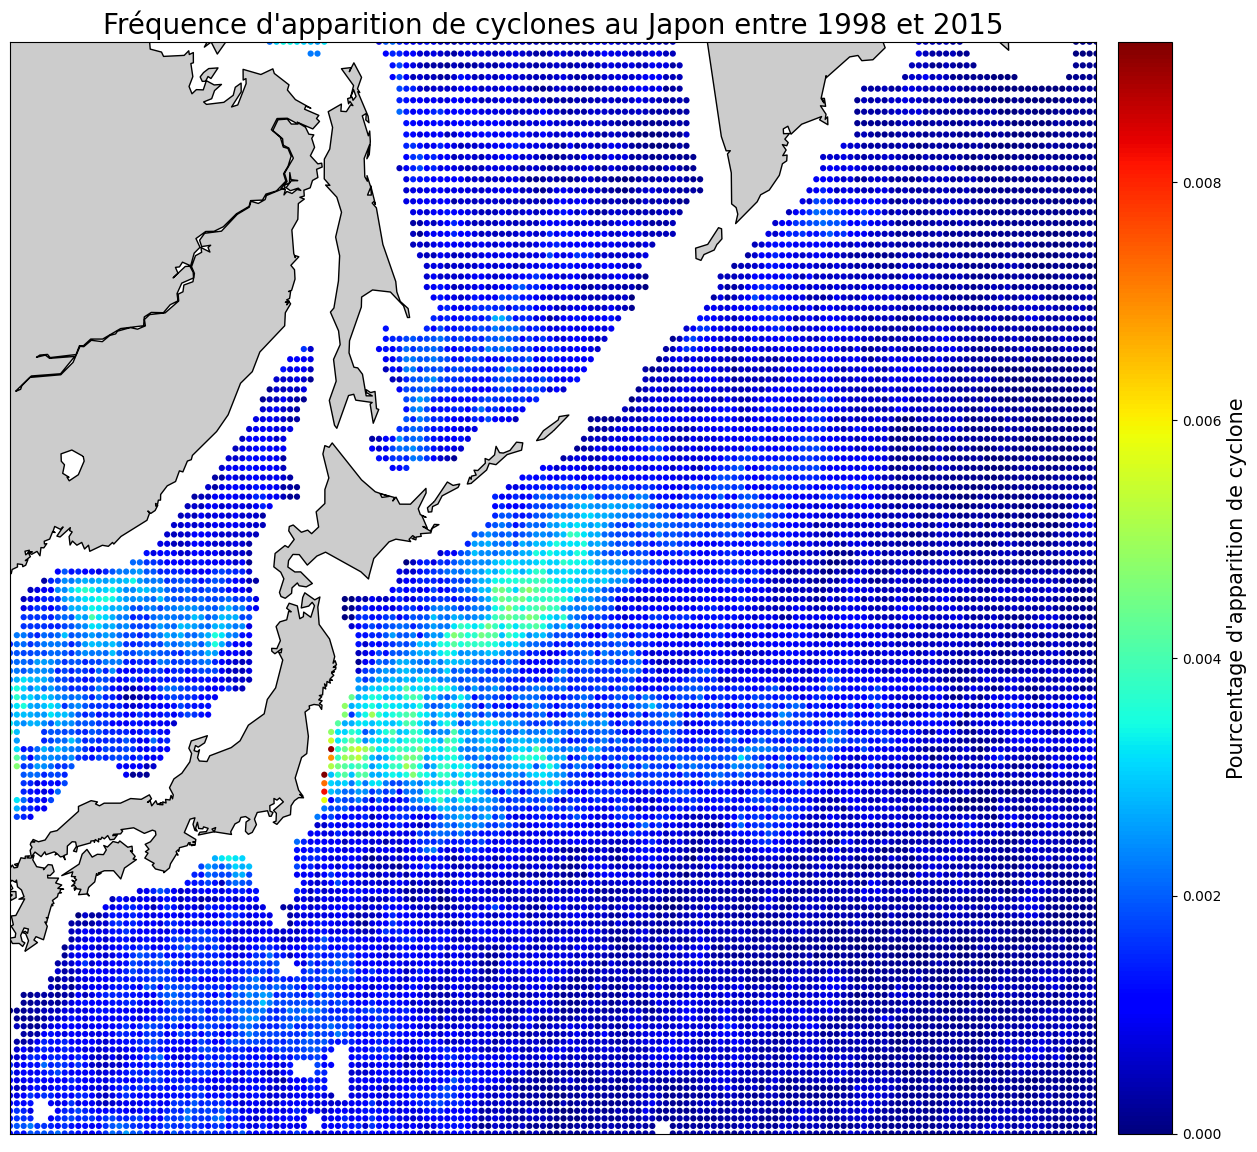

In [343]:
plot_im(output6.lon, output6.lat, output6.percent_of_the_time_with_cyclons, 20, 'Pourcentage d\'apparition de cyclone')
title('Fréquence d\'apparition de cyclones au Japon entre 1998 et 2015', size=20)

In [350]:
%%bigquery output7 --project alert-ground-261008
WITH inter AS (
  SELECT lon,lat,year, month, time, ssh, sst
  FROM
    bdo2020.bdo2020.1998_2015_withtimes
  WHERE
    lon>130 AND lon<170 AND lat>25 AND lat<55
),

second_inter AS (
  SELECT
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon , inter1.sst - inter2.sst AS diff_sst, inter1.ssh - inter2.ssh AS diff_ssh
  FROM
    inter AS inter1
  LEFT JOIN
    inter AS inter2
  ON
    inter1.lon = inter2.lon
    AND inter1.lat = inter2.lat
    AND inter1.time = inter2.time - 1
  ORDER BY
    inter1.year, inter1.month, inter1.time, inter1.lat, inter1.lon
),

third_inter AS (
  SELECT lon, lat, year, month,
  AVG(diff_ssh) AS mean_ssh, AVG(diff_sst) AS mean_sst, MIN(diff_ssh) AS min_ssh, MIN(diff_sst) AS min_sst, MAX(diff_ssh) AS max_ssh, MAX(diff_sst) AS max_sst,
  (SELECT COUNT(*) FROM second_inter as sec WHERE sec.year=second_inter.year AND sec.month=second_inter.month AND sec.lon=second_inter.lon AND sec.lat=second_inter.lat AND diff_sst>1.7) AS nb_of_days_with_cyclons
  FROM second_inter
  GROUP BY lon, lat, year, month
  ORDER BY lon, lat, year, month
)

SELECT
  month, AVG(mean_ssh) AS mean_ssh, AVG(mean_sst) AS mean_sst, MIN(min_ssh) AS min_ssh, MIN(min_sst) AS min_sst, MAX(max_ssh) AS max_ssh, MAX(max_sst) AS max_sst,
  AVG(nb_of_days_with_cyclons)/(30.5) percentage_days_with_cyclons
FROM
  third_inter
GROUP BY month
ORDER BY month

Query is running:   0%|          |

Downloading:   0%|          |

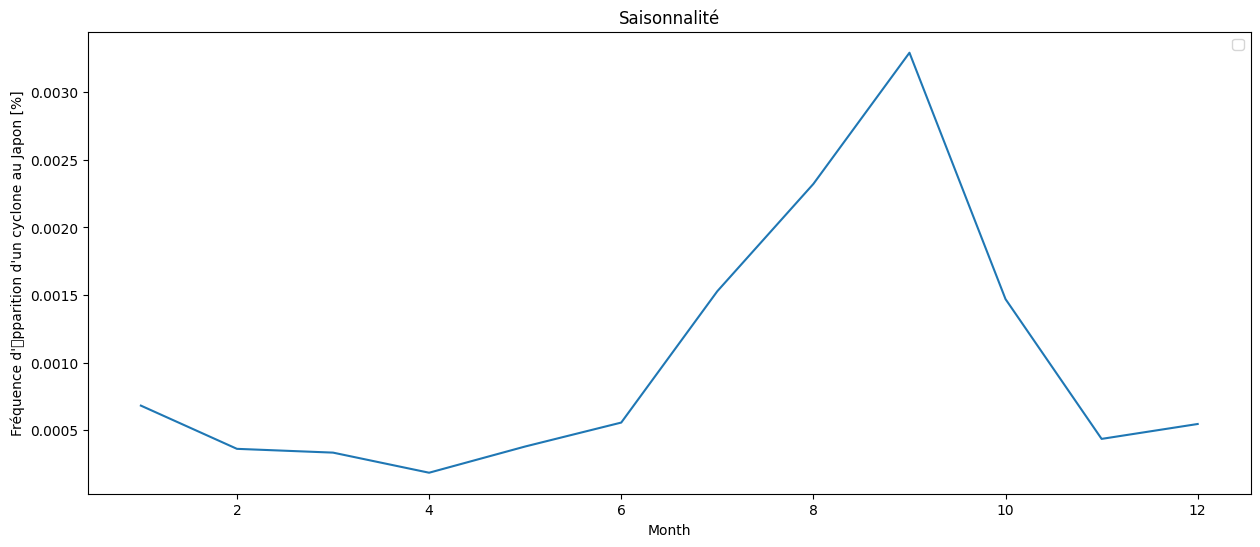

In [351]:
plt.figure(figsize=(15,6))
plot(output7.month, output7.percentage_days_with_cyclons)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Month")
plt.ylabel("Fréquence d'\apparition d'un cyclone au Japon [%]")
plt.title("Saisonnalité")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()